In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
#import spotipy
#import spotipy.util as util


In [156]:
scope = 'playlist-read-private playlist-read-collaborative user-library-read user-read-recently-played user-top-read'
redirect_uri = "http://localhost/"
username = ""
client_id = ""
client_secret = ""

In [157]:
#token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri)
#sp = spotipy.Spotify(auth=token)

#jsonPrettify = lambda x: json.dumps(x, indent=2)

In [158]:
data = pd.read_csv('topChartWithFeatures.csv')
data.head()


,Artist,Song,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,Post Malone,rockstar,1,"1,502,394",1/1/18,0e7ipj03S05BNilyu5bRzt,218147,4,159.801,5,0,0.129,0.585,0.520,0.12400,0.000070
1,G-Eazy,No Limit,2,"1,027,039",1/1/18,2DQ1ITjI0YoLFzuADN1ZBW,245387,4,175.957,1,1,0.405,0.838,0.771,0.01170,0.000000
2,Lil Pump,Gucci Gang,3,"930,620",1/1/18,43ZyHQITOjhciSUUNPVRHc,124056,4,119.889,5,1,0.699,0.936,0.523,0.23900,0.000000
3,Cardi B,Bartier Cardi (feat. 21 Savage),4,"877,478",1/1/18,0dIoGTQXDh1wVnhIiSyYEa,224285,4,138.015,1,1,0.109,0.908,0.524,0.00111,0.000678
4,Camila Cabello,Havana,5,"860,232",1/1/18,1rfofaqEpACxVEHIZBJe6W,217307,4,104.988,2,1,0.394,0.765,0.523,0.18400,0.000036


In [159]:
types = data.dtypes
print(types)

Artist               object
Song                 object
Rank                  int64
Streams              object
Date                 object
Id                   object
Duration              int64
Time Signature        int64
Tempo               float64
Key                   int64
Mode                  int64
 Valence            float64
Danceability        float64
Energy              float64
Acousticness        float64
Instrumentalness    float64
dtype: object


In [160]:
#data2 = data.loc[data['Date']<='1/30/18']
rankdata = data.loc[data['Rank']<=10]
print(rankdata)

                Artist                                Song  Rank    Streams  \
0          Post Malone                            rockstar     1  1,502,394   
1               G-Eazy                            No Limit     2  1,027,039   
2             Lil Pump                          Gucci Gang     3    930,620   
3              Cardi B     Bartier Cardi (feat. 21 Savage)     4    877,478   
4       Camila Cabello                              Havana     5    860,232   
5               Offset     Ric Flair Drip (& Metro Boomin)     6    833,470   
6               G-Eazy               Him & I (with Halsey)     7    823,508   
7          Post Malone                        I Fall Apart     8    813,516   
8               Khalid                  Young Dumb & Broke     9    734,845   
9         Lil Uzi Vert                       XO Tour Llif3    10    683,284   
200        Post Malone                            rockstar     1  1,328,257   
201             G-Eazy                            No

In [161]:
features = data[['Danceability', 'Energy', 'Duration', 'Acousticness', 'Key','Mode','Instrumentalness','Tempo', 'Time Signature']]
dancef= data.loc[data['Danceability']
#target = data['Rank']
#target2 = data.loc[data['Rank']=1]
#print(target2)

SyntaxError: unexpected EOF while parsing (<ipython-input-161-074dd76beaff>, line 5)

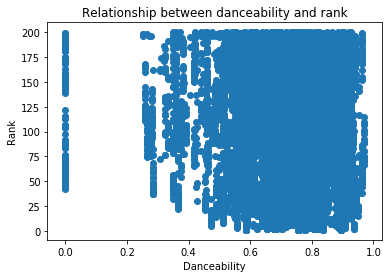

In [162]:
plt.scatter(data2['Danceability'],data2['Rank'])
plt.title('Relationship between danceability and rank')
plt.xlabel('Danceability')
plt.ylabel('Rank')
plt.show()

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(data[['Tempo']], data[['Rank']])

In [164]:
# generate numbers across the spread of data
test = pd.DataFrame({'cost': pd.Series(range(10000, 67000, 100))})
# predict on that spread
predictions = model.predict(test)

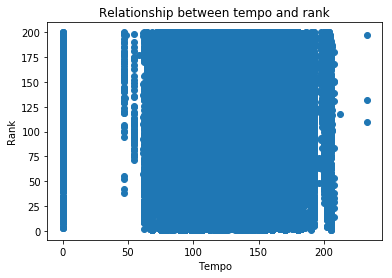

In [165]:
plt.scatter(data['Tempo'], data['Rank'])
plt.title('Relationship between tempo and rank')
plt.xlabel('Tempo')
plt.ylabel('Rank')
plt.show()

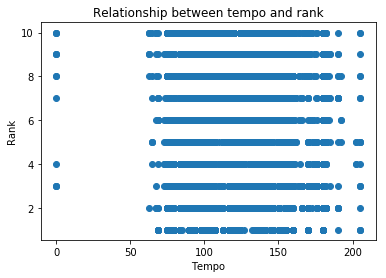

In [166]:
plt.scatter(rankdata['Tempo'], rankdata['Rank'])
plt.title('Relationship between tempo and rank')
plt.xlabel('Tempo')
plt.ylabel('Rank')
plt.show()

In [167]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [168]:
model = model.fit(data[['Tempo']], data[['Rank']])

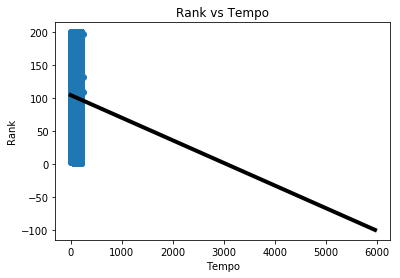

In [169]:

test = pd.DataFrame({'Tempo': pd.Series(range(0, 5980, 30))})
# predict on that spread
predictions = model.predict(test)

plt.scatter(data['Tempo'], data['Rank'])
plt.plot(test, predictions, 'k', linewidth=4)
plt.title('Rank vs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Rank')
plt.show()

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_train, x_test, y_train, y_test = train_test_split(data[['Tempo']], data[['Rank']], 
                                                    test_size=0.2, random_state=42)

In [172]:
model = model.fit(x_train, y_train)

# generate a score for the effectiveness of model
model.score(x_test, y_test)

9.765540008632724e-05

In [173]:
# Goal: Pick one song, predict rank next day 
#Features: date, last days rank(the day before rank), number of streams, song features 

In [175]:
havanadata = data.loc[data['Song']=="God's Plan"]
#target2 = data.loc[data['Rank']=1]
havanadata.head()

,Artist,Song,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
3800,Drake,God's Plan,1,"2,487,513",1/20/18,6DCZcSspjsKoFjzjrWoCdn,198973,4,77.169,7,1,0.357,0.754,0.449,0.0332,0.000083
4000,Drake,God's Plan,1,"3,319,219",1/21/18,6DCZcSspjsKoFjzjrWoCdn,198973,4,77.169,7,1,0.357,0.754,0.449,0.0332,0.000083
4200,Drake,God's Plan,1,"4,326,679",1/22/18,6DCZcSspjsKoFjzjrWoCdn,198973,4,77.169,7,1,0.357,0.754,0.449,0.0332,0.000083
4400,Drake,God's Plan,1,"4,324,386",1/23/18,6DCZcSspjsKoFjzjrWoCdn,198973,4,77.169,7,1,0.357,0.754,0.449,0.0332,0.000083
4600,Drake,God's Plan,1,"4,708,015",1/24/18,6DCZcSspjsKoFjzjrWoCdn,198973,4,77.169,7,1,0.357,0.754,0.449,0.0332,0.000083
